In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nanodrt2.drt_solver.drt import DRT
from nanodrt2.fitting.optimizer import Optimizer
from nanodrt2.drt_solver.measurements import ImpedenceMeasurement
from nanodrt2.drt_solver.utils import (ZARC, 
                                 gamma_ZARC)
from nanodrt2.plotting.plots import Plot

import jax.numpy as jnp 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Upload the Data and create a Measurement Object 

#columns = ["f", "Z_re", "Z_im"]
df = pd.read_csv("/Users/taramurphy/Documents/2024/code/nanodrt2/data/fake_data.csv")

f = df["f"].values
tau = jnp.flip(jnp.logspace(-4, 4, 500))

Z_exact_re =  df["Z_re"].values # can we do all this inside the measurement?
Z_exact_im =  df["Z_im"].values

# Create our measurement object
measurement = ImpedenceMeasurement(Z_exact_re, Z_exact_im, f)

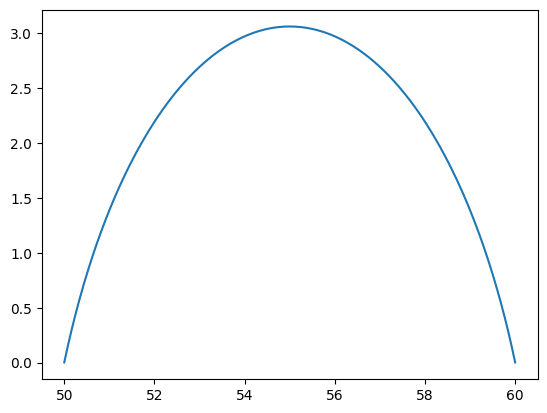

In [5]:
plt.plot(Z_exact_re, -Z_exact_im)
plt.show()

Following our initial guess we now create a DRT object which will contain all the information of the DRT spectrum. This will then be passed to a Optimisation Object and be used to store information in the optimisation process. 

In [7]:
drt = DRT(R_inf= 10, L_0=0, x=gamma_guess, tau=tau)

We now build our optimiser. Note that currently only the method 'regression' is implemented for fitting. However in the future, more methods shall be implemented. When determining the DRT spectrum we also note two methods of integration are currently available 'trapezoid' and 'rbf', which determine the integrals using the trapezoidal rule and the RBF discretisation methods respectively.

In [14]:
solver_dict = {"init_lbd": 1, 'maxiter': 1e5, 'mu': 1.0}
optim = Optimizer(drt=drt, measurement=measurement, solver="regression", integration_method="rbf", solver_dict = solver_dict, rbf_function="gaussian")
final_sim = optim.run()

The optimisation has returned a FittedSpectrum object, which can now be used to plot and analyse the impedence data. 

In [15]:
Z_re, Z_im = final_sim.simulate()

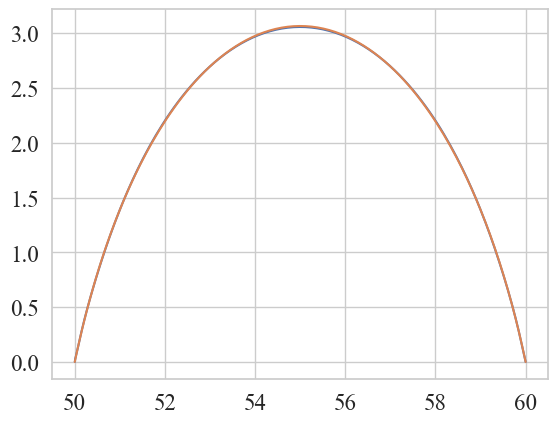

In [16]:
plt.plot(Z_re, -Z_im)
plt.plot(Z_exact_re, -Z_exact_im)
plt.show()

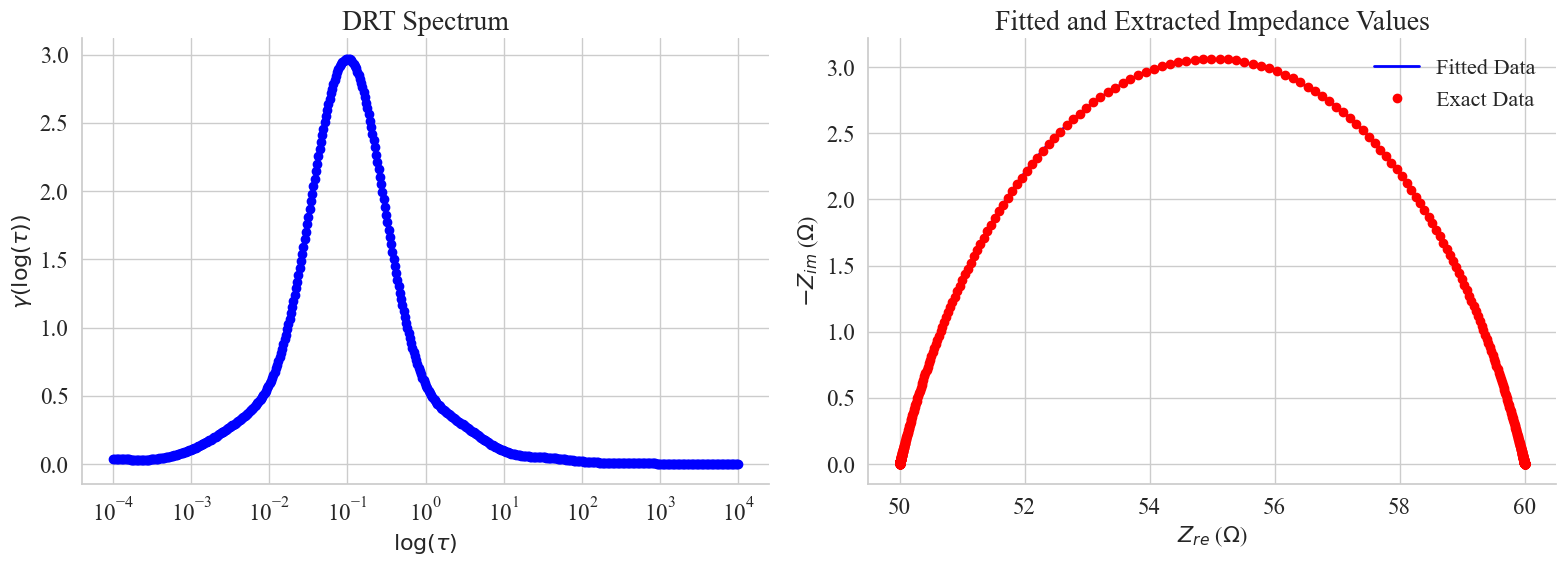

In [17]:
plot = Plot(final_sim=final_sim, measurement=measurement)
plot.show()

## 1. Fitting to the Double ZARC Model

Now we repeat the same method for the Double ZARC model. To spice things up a bit, let's use the trapezoidal rule in the optimisation process. 


In [18]:
columns = ["f", "Z_re", "Z_im"]
df = pd.read_csv("data/double_ZARC.csv",)

f = jnp.array(df["f"].values)
tau = 1./(2*jnp.pi*f)
tau = jnp.flip(jnp.logspace(-4, 4, 500))

Z_exact_re =  jnp.array(df["Z_re"].values)
Z_exact_im =  jnp.array(df["Z_im"].values)

# Create our measurement object
measurement = ImpedenceMeasurement(Z_exact_re, Z_exact_im, f)

In [19]:
drt = DRT(R_inf= 10, L_0=0, x=gamma_guess, tau=tau)
solver_dict = {'init_lbd': 2., 'maxiter': 5e4, 'mu': 1.0}
optim = Optimizer(drt=drt, measurement=measurement, solver="regression", rbf_function="gaussian", integration_method="rbf", solver_dict = solver_dict)
final_sim = optim.run()


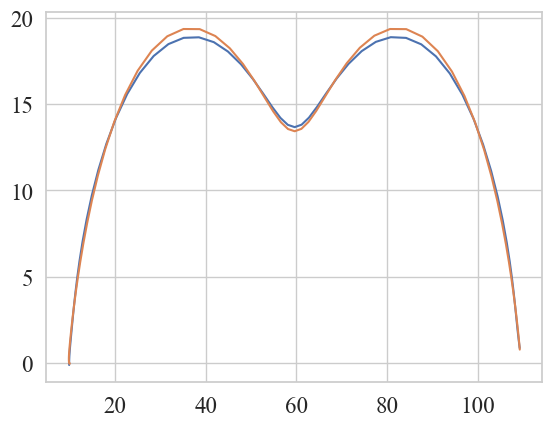

In [20]:
Z_re, Z_im = final_sim.simulate()
plt.plot(Z_re, -Z_im)
plt.plot(Z_exact_re, -Z_exact_im)
plt.show()

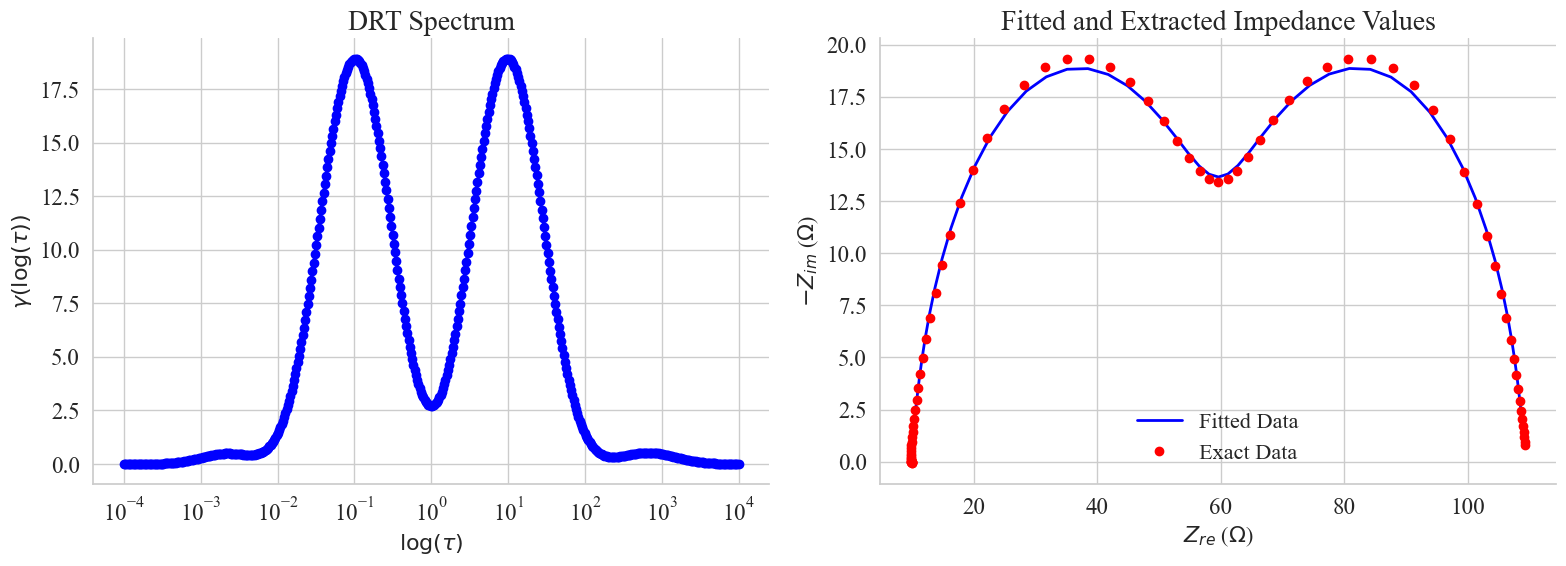

In [21]:
plot = Plot(final_sim, measurement)
plot.show()

# 3. Fitting Ed's Data

Please note that further work is needed for this - particularly with choosing the regularisation parameter.. The next step for me is to look at different ways that one can determine this parameters such as the L curve or cross validation. 

And finally, we fit to Ed's data - much work needs to be done from my end - will discuss next time I see you... 

In [22]:
columns = ["f", "Z_re", "Z_im"]
df = pd.read_csv("data/ed_data_1.csv",)

f = jnp.array(df["f"].values)
tau = 1./(2*jnp.pi*f)
tau = jnp.flip(jnp.logspace(-8, 4, 100)) # Change range here for what tau range you would like to explore

Z_exact_re =  jnp.array(df["Z_re"].values)
Z_exact_im =  jnp.array(df["Z_im"].values)

# Create our measurement object
measurement = ImpedenceMeasurement(Z_exact_re, Z_exact_im, f)

In [33]:
gamma_guess = gamma_ZARC(tau, R_ct=33, tau_0=.2, phi= .7)

drt = DRT(R_inf= 10, L_0=0, x=gamma_guess, tau=tau)

solver_dict = {'init_lbd': .0, 'lbd_selection': "GCV", 'maxiter': 5e5, "mu": 1.0 }
optim = Optimizer(drt=drt, measurement=measurement, solver="regression",rbf_function="gaussian", solver_dict = solver_dict, )
final_sim = optim.run()

# Assuming Z_re_fitted, Z_im_fitted, Z_exact_re, Z_exact_im are already defined
Z_re_fitted, Z_im_fitted = final_sim.simulate()


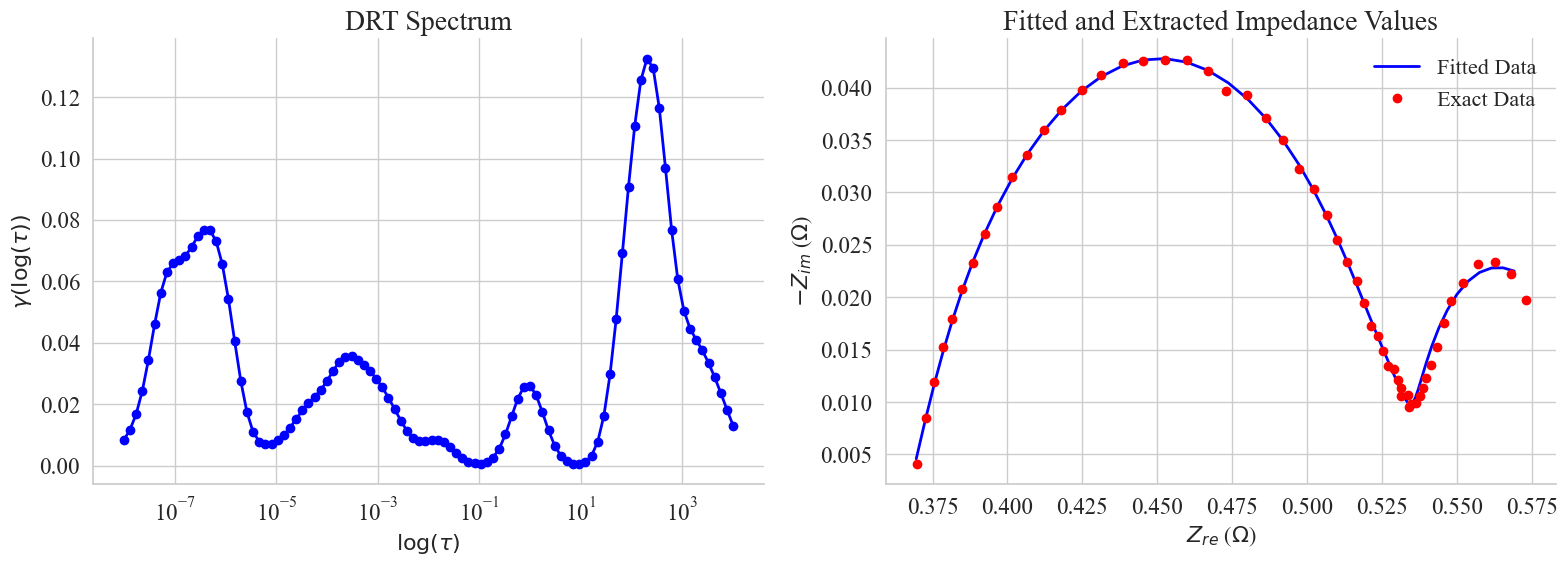

In [34]:
plot = Plot(final_sim, measurement)
plot.show()